# 告别Hello World，来一个计算机视觉示例
主要参考于[DeepLearning.ai课程](https://github.com/lmoroney/dlaicourse)

在上一部分，我们已经知道如何创建一个神经网络来解决您试图解决的问题。这是一个学习行为的明确例子。当然，在这种情况下，这样做有点过头了，因为直接写出函数Y=2x-1会更容易，而不是麻烦地使用机器学习来学习一组固定值的X和Y之间的关系，并将其扩展到所有值。

**Question：**
但是，编写更为复杂困难的规则应该怎么办？ 

如（计算机视觉问题）：假设一个场景，在该场景中，我们可以识别出不同的服装，这些服装是从包含10种不同类型的数据集中训练出来的。

## 1. 实现代码

### 1.1 导入包

In [5]:
import tensorflow as tf
print(tf.__version__)

2.1.0


### 1.2 导入训练集
Fashion MNIST数据可直接在tf.keras数据集API中获得。 您可以这样加载它：

In [2]:
mnist = tf.keras.datasets.fashion_mnist

在该对象上调用load_data将为您提供两组两个列表，这两个列表将是包含服装项目及其标签的图形的训练和测试值

In [10]:

import numpy as np
import os
import gzip

# 定义加载数据的函数，data_folder为保存gz数据的文件夹，该文件夹下有4个文件
# 'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
# 't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'

# 手动加载本地数据集
def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')
print(train_images.shape)

(60000, 28, 28)


这些值是什么样子的?让我们打印一个训练图像，和一个训练标签，看看…在数组中使用不同的索引进行实验

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

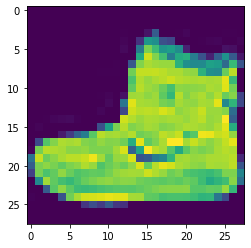

In [11]:
# 控制输出的方式
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

### 1.3 数据预处理
您会注意到，数字中的所有值都在0到255之间。如果我们在训练神经网络，出于各种原因，将所有值都视为0到1之间的过程会更容易，这一过程称为“规范化”。 幸运的是，在Python中，无需循环就可以很容易地标准化这样的列表。 您可以这样操作：

In [12]:
training_images = training_images / 255.0
test_images = test_images / 255.0

**Question：**
* 现在您可能想知道为什么会有2个集合：训练集和测试集？

**Answer：**
* 记得我们在介绍中谈到过吗？ 这个想法是要有一组要训练的数据，然后有另一组测试的数据(该模型尚未见过的数据),看它在这些测试集进行分类方面处理的有多好。 毕竟，训练完成之后，您将想要使用以前未曾见过的数据进行分类！

### 1.4 构建神经网络
现在让我们设计神经网络模型。 这里有很多新概念，但是请放心，您以后将掌握它们。

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)])


**代码解释：**
* Sequential：这在神经网络中定义了一个层次序列
* Flatten：还记得之前我们的图像是正方形的吗?Flatten就是把这个正方形变成一个一维的集合。
* Dense：增加一层神经元
* 一层神经元都需要一个激活函数来告诉它们做什么。有很多选择，但现在只使用这些：
 * Relu：“如果X>0返回X，否则返回0”，所以它做的是只传递值0或大于0到网络的下一层。
 * Softmax：取一组值并有效地选择最大的值，然后将其转化为[0,0,0,0,1,0,0,0,0,0]，可以节省大量编码！

### 1.5 编译和训练神经网络
现在模型已经定义好了，接下来要做的就是实际构建它。与前面一样，您可以通过使用优化器和损失函数来编译它，然后通过调用model.fit()来训练它。让它找出训练数据之间的关系和其实际标签,所以在未来如果你有看起来像训练数据的数据,可以使用它来预测数据的标签。

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1173 - accuracy: 0.9559
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1126 - accuracy: 0.9571
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1111 - accuracy: 0.9576
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1080 - accuracy: 0.9590
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1080 - accuracy: 0.9596


完成训练后，您将在最后一个阶段的末尾看到一个准确性值。 它可能看起来像0.9098。 这告诉您，神经网络在对训练数据进行分类时的准确度约为91％。不太好，但考虑到它只训练了五个阶段并且很快完成，所以还不错。

但是如何处理之前没有见过的数据呢？ 这就是为什么我们有测试数据集。 我们可以调用model.evaluate()，并传入两个集合，它将报告每个集合的损失。 试一试吧：


In [20]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.4975 - accuracy: 0.8862


[0.4974778610289097, 0.8862]

由上可知，返回的精度约为.8862，这意味着它的精度约为88％。 正如预期的那样，对于从未见过的数据，它可能不如对经过训练的数据那样好！ 在本课程的学习过程中，您将研究改进此模型的方法。

为了进一步探索，尝试下面的练习

## 2. 练习
### 2.1 练习1
运行下面的代码:它为每个测试图像创建一组分类，然后打印分类中的第一个条目。运行后的输出是一个数字列表。你认为这是为什么，这些数字代表什么

**提示：**
 * 尝试运行print（test_labels [0]），您将得到9。这是否有助于您理解此列表的含义？

In [27]:
classifications = model.predict(test_images)
print(classifications[0].shape)
print(classifications[0])
print(np.argmax(classifications[0]))

(10,)
[9.8304622e-16 1.8208030e-19 1.9570797e-12 4.5985155e-20 1.1646033e-22 1.8100557e-07 5.3082797e-15 9.3051276e-05 8.6178436e-20 9.9990678e-01]
9


In [25]:
print(test_labels[0])

9


**Question：**
 * 这个列表代表什么？
 
**Answer：**
 * 模型的输出是10个数字的列表。 这些数字是被分类的值，是相应值的概率，即列表中的第一个值是图像的值为'0 '（T恤/上衣），下一个是'1'（长裤）等。请注意，它们都是非常低的概率。
 
 * 对于9(踝靴)，概率是在99%，也就是说，神经网络告诉我们，它几乎肯定是踝靴。
 
**Question：**
 * 您如何知道此列表告诉您该物品是踝靴？


**Answer：**
 * 列表和标签都是从0开始，因此带有标签9的踝靴表示它是10个类中的第10类。具有10个元素的列表的最大值在9这个位置，表示神经网络已预测其分类的项目很可能是踝靴

### 2.2 练习2
现在让我们观察模型中的隐藏层。以不同神经元数量对稠密层(隐藏层)进行实验，

如：有512个神经元。你得到了什么不同的结果损失，训练时间等?为什么会这样呢？

In [30]:
import tensorflow as tf
print(tf.__version__)

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

# 数据预处理
training_images = training_images / 255.0
test_images = test_images / 255.0

# 构建神经网络
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# 编译神经网络
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# 训练神经网络
model.fit(training_images, training_labels, epochs=5)

# 在测试集上评估神经网络精度
model.evaluate(test_images, test_labels)

# 在测试集上进行预测
classifications = model.predict(test_images)
                                    
print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 307us/sample - loss: 0.4702
Epoch 2/5
60000/60000 [==============================] - 17s 285us/sample - loss: 0.3580
Epoch 3/5
60000/60000 [==============================] - 16s 273us/sample - loss: 0.3193
Epoch 4/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2975
Epoch 5/5
10000/10000 [==============================] - 1s 110us/sample - loss: 0.3524
0.3524129024147987
[1.7926300e-07 7.1515279e-07 7.0448280e-08 2.3757719e-08 6.0433017e-08 4.0516013e-04 9.2221308e-07 1.7175958e-02 1.4223048e-07 9.8241675e-01]
9


10000/10000 [==============================] - 1s 98us/sample - loss: 0.3524


0.3524129024147987

**Question：**
 * 增加到1024个神经元——有什么影响？

**Answer：**
 * 通过增加更多的神经元，我们需要做更多的计算，从而减慢计算过程，但在这种情况下，它们有很好的影响——我们确实得到了更精确的结果。这并不意味着总是“越多越好”，你可以很快地达到收益递减的规律

### 2.3 练习3
**Question：**
 * 如果移除Flatten()层会发生什么?为什么会这样呢？

**Answer：**
 * 您会得到有关数据形状的错误。 现在看来似乎很模糊，但它加强了经验法则，即网络中的第一层应与数据的形状相同。 现在，我们的数据是28x28的图像，而28层28个神经元将是不可行的，因此将28,28展平为784x1更有意义。 无需编写所有代码来自行处理，而是在开始时添加Flatten（）层，然后在以后将数组加载到模型中时，它们将自动为我们展平。

In [33]:
import tensorflow as tf
print(tf.__version__)

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 58s

ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).

### 2.4 练习4
**Question：**
* 考虑最后的(输出)层。为什么有10个呢?如果你有一个和10不同的数量会发生什么?例如，尝试用5来训练网络
 
**Answer：**
* 一旦发现意外值，就会出现错误。所以另一个经验法则是：最后一层的神经元数量应该与您要分类的类的数量相匹配。在这种情况下，它是数字0-9，所以有10个，因此你应该有10个神经元在你的最后一层。

In [34]:
import tensorflow as tf
print(tf.__version__)

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

# 数据预处理
training_images = training_images / 255.0
test_images = test_images / 255.0

# 构建神经网络
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(5,activation=tf.nn.softmax)])

# 编译神经网络
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# 训练神经网络
model.fit(training_images, training_labels, epochs=5)

# 在测试集上评估神经网络精度
model.evaluate(test_images, test_labels)

# 在测试集上进行预测
classifications = model.predict(test_images)
                                    
print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 7:11

InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 7 6 9 2 4 4 4 3 3 2 0 5 2 2 0 4 2 0 4 3 1 2 2 5 9 3 2 5 8 4 1
	 [[node loss/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-34-e89157eb281f>:21) ]] [Op:__inference_distributed_function_323808]

Function call stack:
distributed_function


### 2.5 练习5
**Question：**
* 考虑在神经网络中添加其他层的影响。如果你在512层和最后一个10层之间再添加一个图层会发生什么?

**Answer：**
* 不会产生重大影响-因为这是相对简单的数据。 对于更复杂的数据（包括将在下一课中看到的分类为花朵的彩色图像），通常需要额外的图层。

In [36]:
import tensorflow as tf
print(tf.__version__)

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

# 数据预处理
training_images = training_images / 255.0
test_images = test_images / 255.0

# 构建神经网络
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                                       tf.keras.layers.Dense(256,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# 编译神经网络
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# 训练神经网络
model.fit(training_images, training_labels, epochs=5)

# 在测试集上评估神经网络精度
model.evaluate(test_images, test_labels)

# 在测试集上进行预测
classifications = model.predict(test_images)
                                    
print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 392us/sample - loss: 0.4668
Epoch 2/5
60000/60000 [==============================] - 22s 365us/sample - loss: 0.3563
Epoch 3/5
60000/60000 [==============================] - 22s 366us/sample - loss: 0.3202
Epoch 4/5
60000/60000 [==============================] - 22s 369us/sample - loss: 0.2962
Epoch 5/5
10000/10000 [==============================] - 1s 130us/sample - loss: 0.3398
[8.63851005e-11 5.15013543e-09 5.59703915e-11 2.06166473e-11 1.01022544e-10 4.05154889e-04 4.79927986e-10 7.44439822e-05 2.90364593e-10 9.99520421e-01]
9


### 2.6 练习6
**Question：**
* 考虑一下更多或者更少的迭代训练的影响。为什么会这样呢？

**Answer：**
* 尝试15个epoch，你可能会得到一个损失比5个尝试30个epoch更好的模型，你可能会看到损失值停止下降，或者增加。这是所谓的“过度拟合”的副作用，在训练神经网络时，你需要注意这一点。如果你不能改善你的损失，那么浪费时间训练是没有意义的。

In [37]:
import tensorflow as tf
print(tf.__version__)

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

# 数据预处理
training_images = training_images / 255.0
test_images = test_images / 255.0

# 构建神经网络
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                                       tf.keras.layers.Dense(256,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# 编译神经网络
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# 训练神经网络
model.fit(training_images, training_labels, epochs=30)

# 在测试集上评估神经网络精度
model.evaluate(test_images, test_labels)

# 在测试集上进行预测
classifications = model.predict(test_images)
                                    
print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 25s 418us/sample - loss: 0.4670 - lo
Epoch 2/30
60000/60000 [==============================] - 23s 388us/sample - loss: 0.3540
Epoch 3/30
60000/60000 [==============================] - 23s 388us/sample - loss: 0.3197
Epoch 4/30
60000/60000 [==============================] - 24s 395us/sample - loss: 0.2953
Epoch 5/30
60000/60000 [==============================] - 23s 391us/sample - loss: 0.2787
Epoch 6/30
60000/60000 [==============================] - 25s 419us/sample - loss: 0.2651
Epoch 7/30
60000/60000 [==============================] - 24s 392us/sample - loss: 0.2514
Epoch 8/30
60000/60000 [==============================] - 23s 386us/sample - loss: 0.2375
Epoch 9/30
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2300
Epoch 10/30
60000/60000 [==============================] - 25s 411us/sample - loss: 0.2186
Epoch 11/30
60000/60000 [==============================] - 24s 39

### 2.7 练习7
**Question：**
* 在你训练之前，你规范化了数据，从0-255到0-1。取消它会有什么影响?下面是可以尝试的完整代码。为什么你认为你会得到不同的结果？

In [38]:
import tensorflow as tf
print(tf.__version__)

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

# 数据预处理
# training_images = training_images / 255.0
# test_images = test_images / 255.0

# 构建神经网络
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# 编译神经网络
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# 训练神经网络
model.fit(training_images, training_labels, epochs=5)

# 在测试集上评估神经网络精度
model.evaluate(test_images, test_labels)

# 在测试集上进行预测
classifications = model.predict(test_images)
                                    
print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 157us/sample - loss: 4.1872
Epoch 2/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.5443
Epoch 3/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.5065
Epoch 4/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4987
Epoch 5/5
10000/10000 [==============================] - 1s 79us/sample - loss: 0.5288
[5.5088616e-08 4.6340872e-05 1.0414565e-13 2.6813592e-07 1.1049558e-09 7.4835889e-02 2.2240879e-08 1.6517137e-01 6.7469605e-06 7.5993925e-01]
9


### 2.8 练习8
**Question：**
* 早些时候，当你为额外的时代训练时，你可能会有一个问题，你的损失可能会改变。你可能要花一段时间来等待培训完成这个任务，你可能会想，‘如果我能在达到期望值时停止培训，不是很好吗?也就是说，95%的精确度对你来说已经足够了，
* 如果你在3个epoch之后达到了这个精度，为什么还要等着它完成更多的epoch呢?那么你该如何解决这个问题呢?像其他程序一样…你有回调!让我们看看它们的执行……

In [39]:
import tensorflow as tf
print(tf.__version__)

# 定义一个回调类
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("你训练的模型已经达到60%的精度，可以停止迭代了！")
            self.model.stop_training = True
            

# 实例化一个类
callbacks = myCallback()

# 加载本地下载的数据集
(training_images, training_labels), (test_images, test_labels)= load_data('./MNIST_data/')

# 数据预处理
training_images = training_images / 255.0
test_images = test_images / 255.0

# 构建神经网络
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# 编译神经网络
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# 训练神经网络
# 使用自己创建的回调类
model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.4729
Epoch 2/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3591
